In [35]:
from scanimagetiffio.scanimagetiffio import SITiffIO
import matplotlib.pyplot as plt
import numpy as np

In [36]:
dataFolder = '/home/zilong/Desktop/2PAnalysis/2PData/from_Guifen/162_test2_2blocks_19062023/'
tifffilename = dataFolder+ '162_block1_19062023__00001.tif'
relogfilename = dataFolder + 'REdata_20230619_170256.txt' 

In [37]:
S = SITiffIO()
S.open_tiff_file(tifffilename, "r")
S.open_rotary_file(relogfilename)
S.interp_times()  # might take a while...

Loading rotary encoder file: /home/zilong/Desktop/2PAnalysis/2PData/from_Guifen/162_test2_2blocks_19062023/REdata_20230619_170256.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 79743 timestamps in it.
Counted 18000 frames


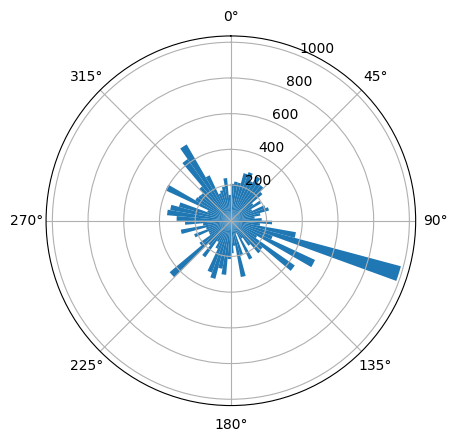

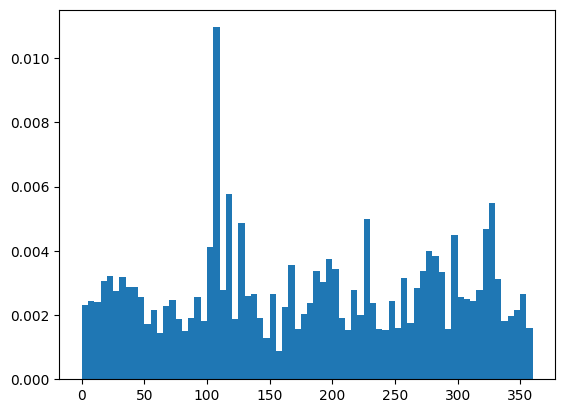

In [34]:
angles = S.get_all_theta()
plt.figure()
#change the histogram to a polar plot with normalized density
ax = plt.subplot(111, projection='polar')
#set the zero angle to the top of the plot
ax.set_theta_zero_location('N')
#set the clockwise direction to be the positive direction
ax.set_theta_direction(-1)
#plot the histogram
ax.hist(np.radians(angles), bins=72, density=False)
plt.show()

#do a histogram of the angles without the polar plot
plt.figure()
plt.hist(angles, bins=72, density=True)
plt.show()

In [72]:
#convert angles to numpy array
angles = np.array(angles)

#split 0-360 for 72 bins, each bin is 5 degrees
#find the number of elements of angles that fall into each bin

#make a list of the bin edges
bin_edges = np.linspace(0,360,73)
#make a list of the bin centers
bin_centers = np.linspace(2.5,357.5,72)

#make a list of the number of elements in each bin
bin_counts = np.histogram(angles, bins=bin_edges)[0]

#find the minimum in the list of bin counts
#and through a warning if the minimum is less than 10
if np.min(bin_counts) < 50:
    print('WARNING: some bins have less than 50 elements')

#for each bin, randomly sample 10 elements from the bin
#and save all the indices in a list
bin_sample_list = []
for i in range(72):
    #find the indices of the elements in the bin
    bin_indices = np.where((angles > bin_edges[i]) & (angles < bin_edges[i+1]))[0]
    #randomly sample np.min(bin_counts) elements from the bin without replacement, and convert to list
    bin_sample =  np.random.choice(bin_indices, np.min(bin_counts), replace=False).tolist()
    #add bin_sample into bin_sample_list
    bin_sample_list += bin_sample
    


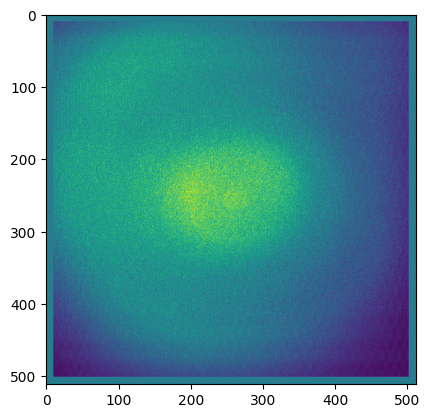

In [73]:
#extract frames from S accroding to the bin_sample_list
#and average them all together
#to save space,, we running average the frames

#initialize the running average
running_average = np.zeros(S.get_frame(1).shape)
#loop through the bin_sample_list
for i in bin_sample_list:
    #get the frame
    frame = S.get_frame(i)
    #add the frame to the running average devide by the number of frames
    running_average += frame/len(bin_sample_list)

#set the border (10 pixels) to median value
#othersiwse the border will be very bright and dominate the normalization
running_average[:10,:] = np.median(running_average)
running_average[-10:,:] = np.median(running_average)
running_average[:,:10] = np.median(running_average)
running_average[:,-10:] = np.median(running_average)

#normalize the running_average to 0-255
running_average = running_average - np.min(running_average)
running_average = running_average/np.max(running_average)
running_average = running_average*255

#change to uint8
running_average = np.uint8(running_average)

#plot the running average
plt.figure()
plt.imshow(running_average)
plt.show()
    

In [62]:
running_average

array([[-956.00833333, -307.60138889, -956.85925926, ..., -277.52314815,
        -957.30231481, -266.05648148],
       [-958.20185185, -304.5537037 , -958.57824074, ..., -277.26574074,
        -959.13240741, -270.92175926],
       [-958.90648148, -331.7       , -959.6       , ..., -279.25231481,
        -959.36435185, -308.56388889],
       ...,
       [-331.36527778, -960.21759259, -329.84166667, ..., -960.11481481,
        -301.35462963, -960.01805556],
       [-304.9662037 , -958.8787037 , -315.73796296, ..., -959.0037037 ,
        -279.8875    , -958.38657407],
       [-314.55925926, -957.77824074, -318.6375    , ..., -957.48333333,
        -284.71805556, -957.34814815]])

In [60]:
running_average.shape

(0, 0)